<a href="https://colab.research.google.com/github/jonathanmendoza-tx/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Jonathan_Mendoza_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

## Load and clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['class','handicapped_infants','water_proj_costshare','adopt_budget_res',
        'physician_fee_frz','el_salvador_aid','religious_grps_in_schools',
        'anti_sat_test_ban','nicaraguan_contras_aid','mx_missle','immigration',
        'synfuels_corp_cutback','edu_spending','superfund_right_to_sue','crime',
        'duty_free_export','south_africa_export_admin_act']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header = None , na_values = '?', names = cols)
df.fillna(value ='a', inplace = True)
print(df.shape)
df.head()

(435, 17)


,class,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
0,republican,n,y,n,y,y,y,n,n,n,y,a,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,a
2,democrat,a,y,y,a,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,a,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,a,y,y,y,y


In [2]:
df.replace(to_replace = {'y':1,'n':-1,'a':0}, inplace = True)
df.head()

,class,handicapped_infants,water_proj_costshare,adopt_budget_res,physician_fee_frz,el_salvador_aid,religious_grps_in_schools,anti_sat_test_ban,nicaraguan_contras_aid,mx_missle,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_export,south_africa_export_admin_act
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


## Explore

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
class                            435 non-null object
handicapped_infants              435 non-null object
water_proj_costshare             435 non-null object
adopt_budget_res                 435 non-null object
physician_fee_frz                435 non-null object
el_salvador_aid                  435 non-null object
religious_grps_in_schools        435 non-null object
anti_sat_test_ban                435 non-null object
nicaraguan_contras_aid           435 non-null object
mx_missle                        435 non-null object
immigration                      435 non-null object
synfuels_corp_cutback            435 non-null object
edu_spending                     435 non-null object
superfund_right_to_sue           435 non-null object
crime                            435 non-null object
duty_free_export                 435 non-null object
south_africa_export_admin_act    435 non-null o

In [0]:
df['class'].value_counts()

democrat      267
republican    168
Name: class, dtype: int64

In [0]:
votes = df.groupby('class').sum().T.sort_values(by = 'democrat', ascending = False)
votes

class,democrat,republican
adopt_budget_res,202,-120
nicaraguan_contras_aid,173,-109
south_africa_export_admin_act,161,46
anti_sat_test_ban,141,-84
mx_missle,128,-127
duty_free_export,69,-128
handicapped_infants,54,-103
synfuels_corp_cutback,3,-117
water_proj_costshare,1,2
religious_grps_in_schools,-12,132


In [0]:
votes['democrat'] = (votes['democrat']/267)*100
votes['republican'] = (votes['republican']/168)*100
votes

class,democrat,republican
adopt_budget_res,75.655431,-71.428571
nicaraguan_contras_aid,64.794007,-64.880952
south_africa_export_admin_act,60.299625,27.380952
anti_sat_test_ban,52.808989,-50.000000
mx_missle,47.940075,-75.595238
duty_free_export,25.842697,-76.190476
handicapped_infants,20.224719,-61.309524
synfuels_corp_cutback,1.123596,-69.642857
water_proj_costshare,0.374532,1.190476
religious_grps_in_schools,-4.494382,78.571429


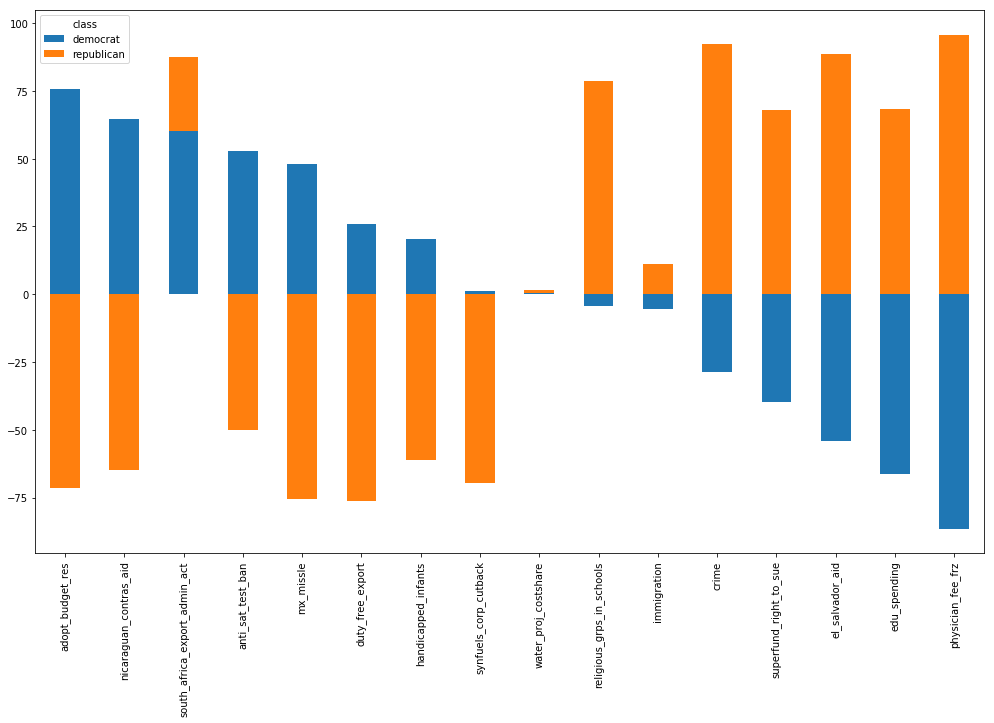

In [0]:
votes.plot.bar(figsize = (17,10), stacked = True)

## Issue democrats support more than republicans

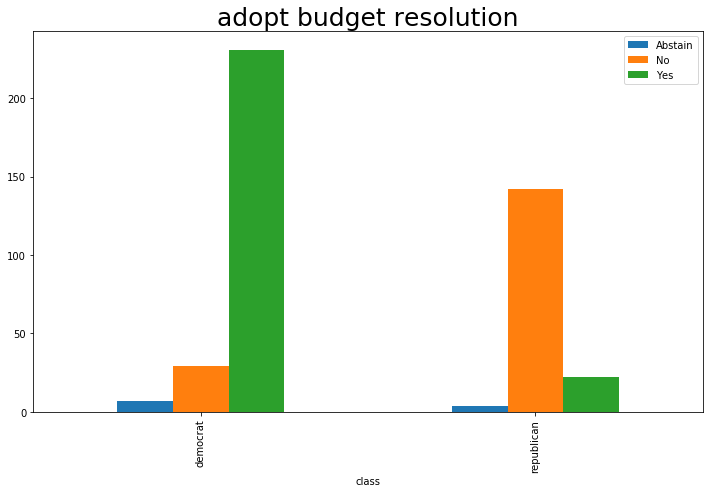

In [21]:
#replace variable names for graphing
df.replace(to_replace = {1:'Yes',-1:'No',0:'Abstain'}, inplace = True)

adopt = pd.crosstab(df['class'],df['adopt_budget_res'])
adopt.plot(kind = 'bar', figsize = (12,7))
plt.title('adopt budget resolution', fontsize = 25)
plt.legend()

### Test hypothesis

In [25]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

tstat, pvalue = ttest_ind(df[df['adopt_budget_res']=='yes'], df[df['adopt_budget_res']=='no'])
print(tstat)
print(pvalue)

nan
nan


## Issue republicans support more than democrats

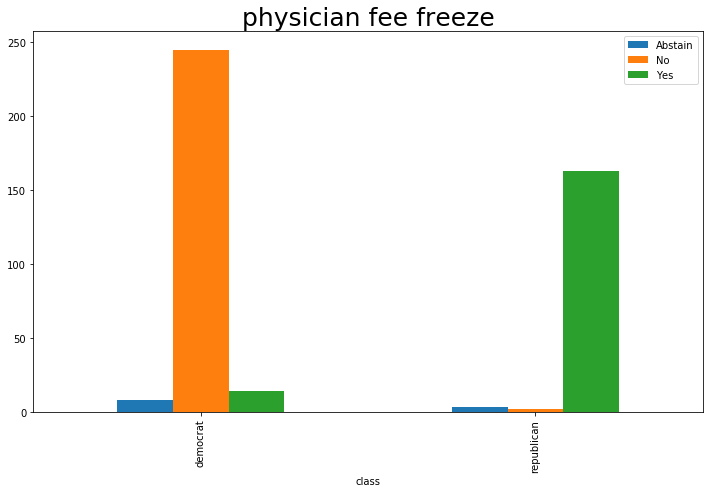

In [12]:
phys = pd.crosstab(df['class'],df['physician_fee_frz'])
phys.plot(kind = 'bar', figsize = (12,7))
plt.title('physician fee freeze', fontsize = 25)
plt.legend()

##Issue both sides are conflicted on

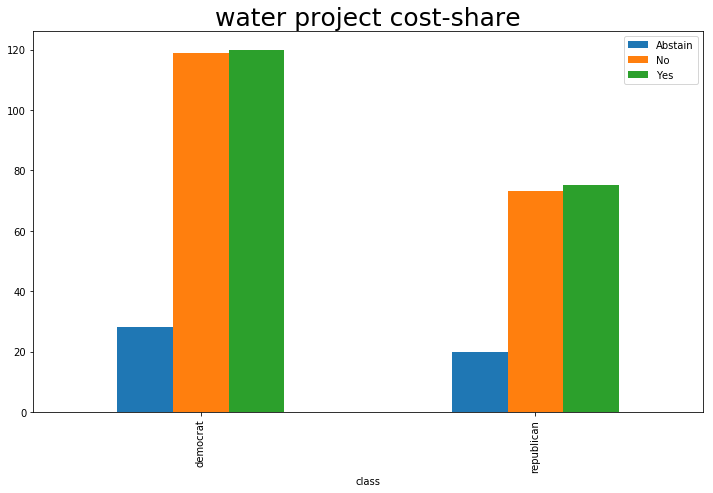

In [13]:
water = pd.crosstab(df['class'],df['water_proj_costshare'])
water.plot(kind = 'bar', figsize = (12,7))
plt.title('water project cost-share', fontsize = 25)
plt.legend()